<a href="https://colab.research.google.com/github/Anshad-Aziz/Flood-Prediction-Factors/blob/main/Flood_Prediction_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/flood.csv')

In [3]:
df.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [6]:
df.duplicated().sum()

0

In [7]:
df.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


In [8]:
df.corr()['FloodProbability']

MonsoonIntensity                   0.224081
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Deforestation                      0.220237
Urbanization                       0.220867
ClimateChange                      0.220986
DamsQuality                        0.227467
Siltation                          0.226544
AgriculturalPractices              0.221846
Encroachments                      0.218259
IneffectiveDisasterPreparedness    0.225126
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Landslides                         0.222991
Watersheds                         0.228152
DeterioratingInfrastructure        0.229444
PopulationScore                    0.226928
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
PoliticalFactors                   0.225009
FloodProbability                   1.000000
Name: FloodProbability, dtype: float64

In [9]:
df['FloodProbability']=(df['FloodProbability']>=0.5).astype(int)

In [10]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0


In [11]:
class_counts=df['FloodProbability'].value_counts()

In [12]:
class_percentages=(class_counts/len(df))*100

In [13]:
print(f"Class Count:{class_counts}")
print(f"class Percentages:{class_percentages}")

Class Count:1    25513
0    24487
Name: FloodProbability, dtype: int64
class Percentages:1    51.026
0    48.974
Name: FloodProbability, dtype: float64


In [15]:
import matplotlib.pyplot as plt



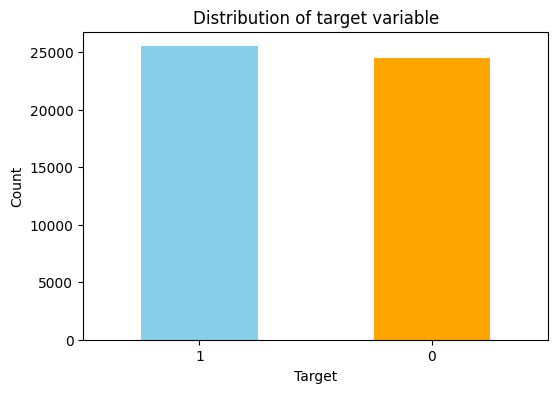

In [16]:
plt.figure(figsize=(6,4))
df['FloodProbability'].value_counts().plot(kind='bar',color=['skyblue','orange'])
plt.title('Distribution of target variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['FloodProbability'])
y=df['FloodProbability']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
X_train.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
38094,5,6,1,8,3,8,5,6,3,3,3,4,7,3,5,5,9,1,3,11
40624,2,3,6,8,6,4,3,9,9,5,6,5,9,4,3,5,6,3,6,2
49425,9,7,5,3,9,7,9,4,7,4,8,4,4,3,3,5,8,7,5,4


In [22]:
y_train.head(3)

38094    0
40624    1
49425    1
Name: FloodProbability, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
num_features=len(X_train.columns)
print(f"Number of input features:{num_features}")

Number of input features:20


In [35]:
model = Sequential()

model.add(Dense(24,activation='relu',input_dim=20))
model.add(Dropout(0.2))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(5,activation='relu'))

model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                504       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                400       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                

In [37]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [39]:
history = model.fit(X_train_s,y_train,epochs=100,validation_split=0.2, callbacks=callback)

Epoch 1/100
875/875 [==============================] - 6s 4ms/step - loss: 0.4022 - accuracy: 0.8596 - val_loss: 0.2136 - val_accuracy: 0.9811
Epoch 2/100
875/875 [==============================] - 5s 5ms/step - loss: 0.1837 - accuracy: 0.9716 - val_loss: 0.1145 - val_accuracy: 0.9953
Epoch 3/100
875/875 [==============================] - 4s 4ms/step - loss: 0.1017 - accuracy: 0.9887 - val_loss: 0.0668 - val_accuracy: 0.9983
Epoch 4/100
875/875 [==============================] - 4s 5ms/step - loss: 0.0604 - accuracy: 0.9946 - val_loss: 0.0391 - val_accuracy: 0.9997
Epoch 5/100
875/875 [==============================] - 5s 5ms/step - loss: 0.0381 - accuracy: 0.9973 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 6/100
875/875 [==============================] - 4s 5ms/step - loss: 0.0238 - accuracy: 0.9989 - val_loss: 0.0203 - val_accuracy: 0.9986
Epoch 7/100
875/875 [==============================] - 4s 4ms/step - loss: 0.0197 - accuracy: 0.9978 - val_loss: 0.0115 - val_accuracy: 1.0000

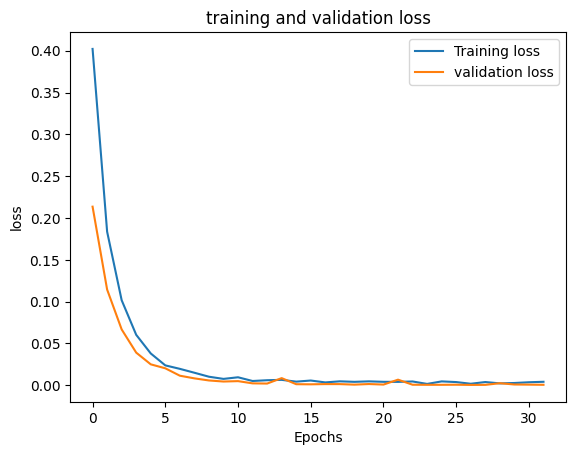

In [41]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='validation loss')

plt.xlabel('Epochs')
plt.ylabel("loss")
plt.title("training and validation loss")
plt.legend()
plt.show()

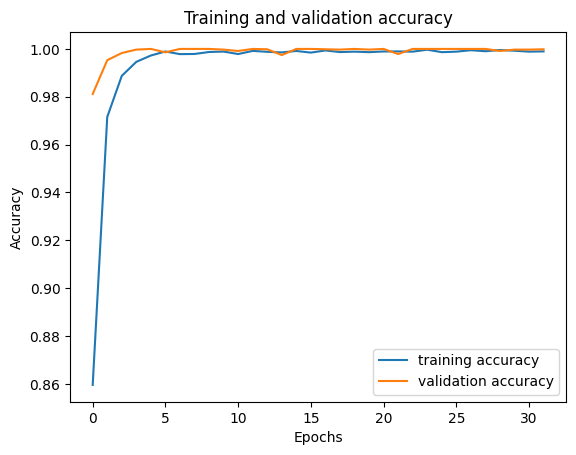

In [43]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [44]:
best_accuracy=history.history['val_accuracy'][-1]
print("best validation accuracy:",best_accuracy)

best validation accuracy: 0.9998571276664734


In [45]:
y_log=model.predict(X_test_s)
y_log

469/469 [==============================] - 2s 4ms/step


array([[7.0944114e-04],
       [1.7969436e-03],
       [7.0944114e-04],
       ...,
       [7.0944114e-04],
       [1.0000000e+00],
       [7.0944114e-04]], dtype=float32)

In [47]:
y_pred=np.where(y_log>0.5,1,0)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999333333333333